# Ensemble classification test

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import ols_functions as of

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['figure.facecolor'] = 'white'

## import variables previously saved for linear regression
Once nice thing about trees is that they don't care about distributions and scaling, so we don't need to do extensive feature scaling here.

In [97]:
reload(of)
allX, allY = of.get_data_for_ensemble()

In [98]:
allX.fillna(value=0, inplace=True)

In [99]:
print allX.shape
print allY.shape

(763247, 109)
(763247,)


In [120]:
if "rank" in allX.columns:
    allX.drop('rank', axis=1, inplace=True)

## train/test/val data

In [121]:
with open('set_train.txt') as f:
    settrain = [t.strip() for t in f.readlines()]
with open('set_test.txt') as f:
    settest = [t.strip() for t in f.readlines()]
with open('set_val.txt') as f:
    setval = [t.strip() for t in f.readlines()]

In [122]:
df_train = allX.loc[settrain]
df_test = allX.loc[settest]

df_val = allX.loc[setval]

In [123]:
print df_train.shape
print df_val.shape
print df_test.shape

(340769, 108)
(108925, 108)
(146383, 108)


In [103]:
y_train = allY.loc[settrain]
y_val = allY.loc[setval]
y_test = allY.loc[settest]

In [104]:
print y_train.shape
print y_test.shape
print y_val.shape

(340769,)
(146383,)
(108925,)


In [124]:
for c in df_train.columns:
    print c

java
lowlevel
max_error_contest
max_error_practice
max_probability_contest
max_probability_practice
max_ratingdiff_contest
max_ratingdiff_practice
max_solvetime
max_timediff
max_wrong_contest
max_wrong_practice
mean_error_contest
mean_error_practice
mean_probability_contest
mean_probability_practice
mean_ratingdiff_contest
mean_ratingdiff_practice
mean_solvetime
mean_timediff
mean_wrong_contest
mean_wrong_practice
min_solvetime
min_timediff
n100
n200
n300
n400
n500
n_solved
n_unlikely01
n_unlikely02
oldrating
performance
python
smoothed_1months
smoothed_2months
smoothed_3months
smoothed_4months
smoothed_5months
std_error_contest
std_error_practice
std_probability_contest
std_probability_practice
std_ratingdiff_contest 
std_ratingdiff_practice
std_solvetime
std_timediff
std_wrong_contest
std_wrong_practice
tot_solvetime
total_contests
total_error_contest
total_error_practice
total_newtags
total_problems
total_wrong_contest
total_wrong_practice
unique_newtags
unique_tags_total
*special
2

## RF regressor

In [128]:
rf = RandomForestRegressor(n_estimators=50, random_state=12358, verbose=1, min_samples_split=3)

In [130]:
model = rf.fit(df_train, y_train)

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 21.8min finished


In [ ]:
test = model.decision_path(np.array(df_train_ok)[0,:])

In [131]:
print model.score(df_train, y_train)
print model.score(df_val, y_val)
print model.score(df_test, y_test)

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.1s finished


0.66733576938


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   10.5s finished


0.902098476175
0.497941044347


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.5s finished


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.9s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.8s finished


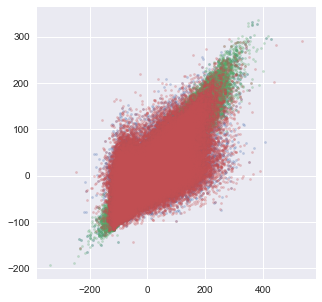

In [132]:
plt.scatter(y_val, rf.predict(df_val), s=5, alpha=.3)
plt.scatter(y_train, rf.predict(df_train), s=5, alpha=.3)
plt.scatter(y_test, rf.predict(df_test), s=5, alpha=.3)

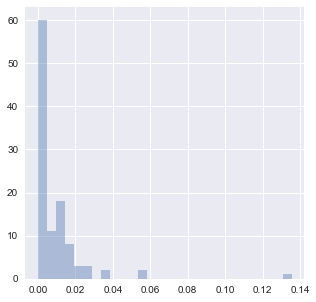

In [133]:
sns.distplot(model.feature_importances_, kde=False)

In [134]:
imp = pd.Series(model.feature_importances_)
imp.index = df_train.columns

In [135]:
imp.sort_values(ascending=False)

performance                  0.135512
n100                         0.055910
oldrating                    0.054287
mean_probability_contest     0.038034
max_ratingdiff_contest       0.035578
total_contests               0.028968
mean_wrong_contest           0.026380
rating_diff_mean             0.026127
std_solvetime                0.023590
smoothed_5months             0.021932
std_probability_contest      0.020568
max_probability_contest      0.017187
mean_ratingdiff_contest      0.017129
smoothed_4months             0.016653
smoothed_3months             0.016224
total_problems               0.016074
min_timediff                 0.015818
std_ratingdiff_contest       0.015197
max_timediff                 0.014674
mean_timediff                0.014502
mean_solvetime               0.013852
n_wrong_mean                 0.013660
std_timediff                 0.013634
smoothed_1months             0.013434
smoothed_2months             0.013176
rating_diff_std              0.013161
std_wrong_co

In [114]:
# are we leaking information??
dropcols = [
    "rank",
    "oldrating",
    'smoothed_1months',
    'smoothed_2months',
    'smoothed_3months',
    'smoothed_4months',
    'smoothed_5months',
]

df_small_val = df_val.copy()
df_small_val.is_copy = False

df_small_test = df_test.copy()
df_small_test.is_copy = False

df_small_train = df_train.copy()
df_small_train.is_copy = False

for d in dropcols:
    df_small_val.drop(d, axis=1, inplace=True)
    df_small_test.drop(d, axis=1, inplace=True)
    df_small_train.drop(d, axis=1, inplace=True)
    
for c in df_small_val.columns:
    if "std" in c:
        df_small_val.drop(c, axis=1, inplace=True)
        df_small_test.drop(c, axis=1, inplace=True)
        df_small_train.drop(c, axis=1, inplace=True)

In [58]:
df_small.columns

Index([u'java', u'lowlevel', u'max_error_contest', u'max_error_practice',
       u'max_probability_contest', u'max_probability_practice',
       u'max_ratingdiff_contest', u'max_ratingdiff_practice', u'max_solvetime',
       u'max_timediff', u'max_wrong_contest', u'max_wrong_practice',
       u'mean_error_contest', u'mean_error_practice',
       u'mean_probability_contest', u'mean_probability_practice',
       u'mean_ratingdiff_contest', u'mean_ratingdiff_practice',
       u'mean_solvetime', u'mean_timediff', u'mean_wrong_contest',
       u'mean_wrong_practice', u'min_solvetime', u'min_timediff', u'n100',
       u'n200', u'n300', u'n400', u'n500', u'n_solved', u'n_unlikely01',
       u'n_unlikely02', u'performance', u'python', u'tot_solvetime',
       u'total_contests', u'total_error_contest', u'total_error_practice',
       u'total_newtags', u'total_problems', u'total_wrong_contest',
       u'total_wrong_practice', u'unique_newtags', u'unique_tags_total',
       u'*special', u'2-sat',

In [115]:
smallmodel = rf.fit(df_small_train, y_train)

print smallmodel.score(df_small_train, y_train)
print smallmodel.score(df_small_val, y_val)
print smallmodel.score(df_small_test, y_test)

0.873581234424
0.624744450396
0.445756568286


In [118]:
example = df_train.copy()
example = example[dropcols]
example['delta'] = y_train
example.head(20)

rank  delta
handle       contestid             
-----        90          653    -59
             108         680    -38
             114         810    -43
             118         917    -32
             120         533    -26
             122        1075    -42
             127         521    104
             131         805     59
---Grigor--- 6            50     69
             8           194    -57
             10          317    -72
             13          413    -86
             17          186    142
             18           27     97
             19          307    -78
             28           73    128
             30           61    165
             33           59     74
             36           67    -35
             37           56     70

In [ ]:
pd.read_csv('ols_tr---Grigor---.csv ')

In [119]:
smallimp = pd.Series(smallmodel.feature_importances_)
smallimp.index = df_small_val.columns
smallimp.sort_values(ascending=False)

performance                  0.138024
oldrating                    0.057156
n100                         0.056762
max_ratingdiff_contest       0.044812
mean_probability_contest     0.041959
mean_wrong_contest           0.032279
total_contests               0.031168
rating_diff_mean             0.029439
smoothed_5months             0.023744
max_probability_contest      0.023471
mean_ratingdiff_contest      0.020882
max_timediff                 0.020870
smoothed_4months             0.019600
max_solvetime                0.019329
min_timediff                 0.019187
total_problems               0.018660
mean_solvetime               0.018407
smoothed_3months             0.018307
n_wrong_mean                 0.018265
mean_timediff                0.017631
max_ratingdiff_practice      0.017326
smoothed_1months             0.015636
time_between_mean            0.015164
mean_ratingdiff_practice     0.015153
smoothed_2months             0.014899
tot_solvetime                0.014361
mean_probabi

In [47]:
impsorted = imp.sort_values(ascending=False)
for a, b in zip(impsorted.index, impsorted):
    print a, b

rank 0.323883393168
oldrating 0.250819302525
drdt 0.111728229083
smoothed_1months 0.0742733834259
performance 0.0357937021205
total_contests 0.012246328031
smoothed_5months 0.0107905325061
smoothed_4months 0.0102085212759
smoothed_2months 0.00866314312289
total_problems 0.00731805042695
max_probability_contest 0.00710932468623
smoothed_3months 0.0070790302425
n_contest 0.0054403499786
rating_diff_mean 0.00416954136327
mean_timediff 0.00407587144134
mean_probability_contest 0.0040121475127
mean_ratingdiff_contest 0.00400559812954
std_probability_contest 0.00393415052862
max_timediff 0.00392764480392
max_ratingdiff_contest 0.00392304894495
std_ratingdiff_contest  0.00380616393968
rating_diff_std 0.00372441257579
min_timediff 0.00356323439965
mean_wrong_contest 0.00354591052406
std_timediff 0.00353854627118
time_between_mean 0.00312990334519
unique_tags_total 0.00307472670532
mean_ratingdiff_practice 0.00298733939993
max_probability_practice 0.00288844297419
std_wrong_contest 0.0028358708

###  try out LIME

KeyboardInterrupt: 

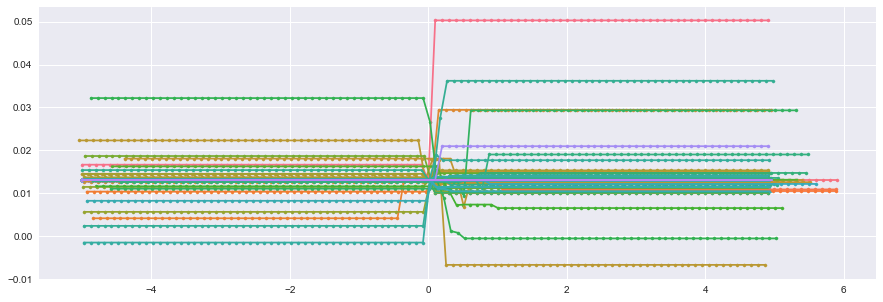

In [151]:
import copy

varidx = 5
nvars = 100
with sns.color_palette("husl", nvars):
    for varidx in range(nvars):
        eps = .1
        x = []
        y = []
        for i in range(-50, 50):
            testin = np.array(df_test_ok.iloc[5])
            testin = testin.reshape(1, -1)
            testin2 = testin.copy()
            testin2[0][varidx] += eps * i
            x.append(testin2[0][varidx])
            y.append(rfcf.predict(testin2))

        plt.rcParams['figure.figsize'] = (15, 5)
        plt.plot(x, y)
        plt.scatter(x, y, s=10)
    #    plt.title(df_train_ok.columns[varidx], fontsize=16)
plt.legend(df_train_ok.columns[0:nvars])

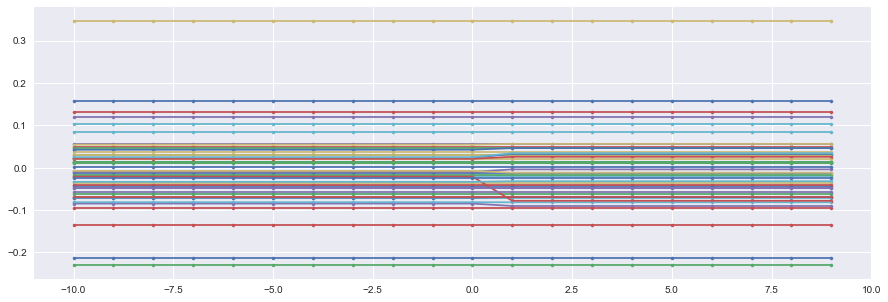

In [165]:
eps = 1
varidx = np.argwhere(df_test_ok.columns == 'graphs')[0]
for j in range(50):
    x = []
    y = []
    for i in range(-10, 10):
        testin = np.array(df_test_ok.iloc[j])
        testin = testin.reshape(1, -1)
        testin2 = testin.copy()
        testin2[0][varidx] += eps * i
        x.append(testin2[0][varidx])
        y.append(rfcf.predict(testin2))

    plt.rcParams['figure.figsize'] = (15, 5)
    plt.plot(x, y)
    plt.scatter(x, y, s=10)

In [150]:
imp.sort_values(ascending=False)

drdt                         0.263730
rank                         0.175584
total_contests               0.072868
mod_perf                     0.068738
smoothed_3months             0.059958
n_contest                    0.047277
oldrating                    0.027988
mean_timediff                0.018174
max_timediff                 0.017907
user_rating                  0.017440
std_timediff                 0.017431
performance                  0.015570
max_probability_contest      0.008878
mean_ratingdiff_contest      0.007975
std_probability_contest      0.007257
total_problems               0.007195
std_ratingdiff_contest       0.006658
max_ratingdiff_contest       0.006580
n_solved                     0.006549
mean_probability_contest     0.006059
std_solvetime                0.005910
max_ratingdiff_practice      0.005751
rating_diff_mean             0.005510
mean_wrong_contest           0.005398
mean_ratingdiff_practice     0.005192
mean_probability_practice    0.005168
min_timediff

# Use original unsmoothed dataset

In [166]:
df_rating = pd.read_csv('user_ratings_smoothed.csv')

df_rating.set_index(['handle', 'contestid'], inplace=True)

In [167]:
indices = indices[1:]

indices2 = [(x[0], int(x[1])) for x in indices]

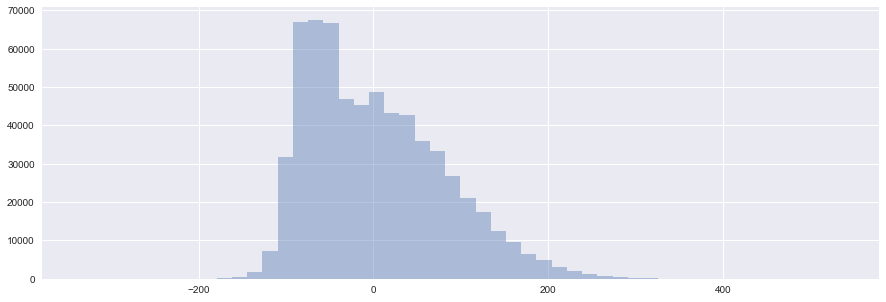

In [168]:
df_rating_subset = df_rating.loc[indices2, ['oldrating', 'newrating']]
df_rating_subset = df_rating_subset.reset_index(level=1)

df_delta = df_rating_subset.newrating - df_rating_subset.oldrating

sns.distplot(df_delta.dropna(), kde=False)

In [ ]:
df_train_ok.is_copy = False
df_rating_subset.is_copy = False
if 'oldrating' in df_train_ok.columns:
    df_train_ok.drop('oldrating', axis=1, inplace=True)
df_train_orig = df_train_ok.join(df_rating_subset)

In [ ]:
yval_train_orig = df_train_orig.newrating - df_train_orig.oldrating

In [ ]:
#df_train_orig.drop(['newrating', 'oldrating'], axis=1, inplace=True)
df_train_orig.drop(['newrating', 'oldrating'], axis=1, inplace=True)

In [ ]:
rf = RandomForestRegressor()
model = rf.fit(df_train_orig, yval_train_orig)

# playing around with test sets

In [ ]:
df_last = pd.read_csv('OLStrain_all_normalized_data_last.csv')

In [154]:
test = df_last.loc['chenmark', df_train.columns]

model.predict(test) * 532.75

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([-3.08058036])

In [176]:
model.score(df_val_ok, yval_val_ok)

0.87794472739190932

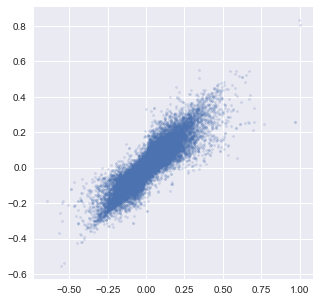

In [185]:
ypred = model.predict(df_test_ok)

plt.scatter(yval_test_ok, ypred, alpha=.2, s=5)

In [189]:
estimator = model
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

AttributeError: 'RandomForestRegressor' object has no attribute 'tree_'